# Pr11-2: テクスチャマッピングの仕組み

解像度の異なるメッシュファイルを入力にして，<br>
拡散反射（光沢のない反射）と鏡面反射（ハイライト）が
どのように解像度に影響されるか分析してください．

## Pr11-2の実装部分

- uv2pixelを実装してください．



```
(x, y) = uv2pixel(uv, w, h)
```

- uv[0]: uの座標が[0, 1]⇒x座標 [0, w-1]
- uv[1]: vの座標が[0, 1]⇒y座標 [h-1, 0]



```
# u⇒xへの変換
x = int(uv[0]*(w-1))

# v⇒yへの変換．上下を逆にすることに注意．
y = int((1.0-uv[1])*(h-1))
```

後で，テクスチャ画像の位置を参照するために(x, y)を整数にしています．
uv2pixelが実装されれば，texture_lookup関数が正しく動作してテクスチャマッピングの結果を見れます．





In [8]:
# Work: 以下の関数を修正．
def uv2pixel(uv, w, h):
  x = int(uv[0] * (w - 1))
  y = int((1.0-uv[1]) * (h - 1))
  return (x,y)

def texture_lookup(uv, T):
  uv_p = uv2pixel(uv, T.shape[1], T.shape[0])
  return T[uv_p[1], uv_p[0], :]

## 読み込み用の補助関数

In [4]:
import cv2

def imread(img_file):
  I = cv2.imread(img_file)
  if I.shape[0] > 1024:
    I = cv2.resize(I, dsize=None, fx=0.25, fy=0.25)
  I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
  return np.float32(I) / 255.0

## 入力画像の表示

- T: テクスチャファイル
- UV: 3DモデルのUV座標をレンダリングした画像

(1024, 1024, 3)
(512, 512, 3)


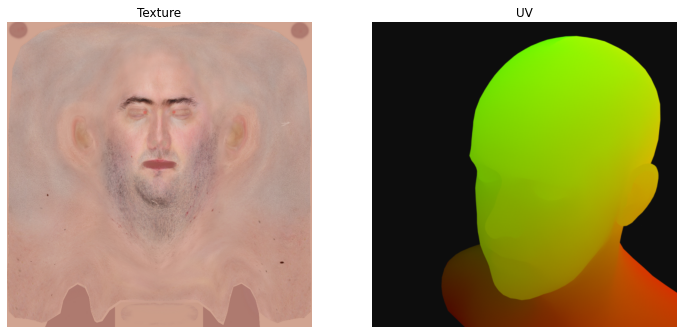

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

texture_file = "lambertian.jpg"
uv_file = "lpshead_uv.png"

T = imread(texture_file)

UV =  imread(uv_file)

fig = plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(T)
plt.title("Texture")
plt.axis('off');

plt.subplot(1, 2, 2)
plt.imshow(UV)
plt.title("UV")
plt.axis('off');

print(T.shape)
print(UV.shape)

## 対応点の確認

uv2pixelが上手く実装されていれば，下でUVとテクスチャ上の位置の対応点を確認することができます．

テクスチャマッピングは，各UVに対応したテクスチャの色を貼り付ける方法になります．

UV(300, 400)= [0.58431375 0.54509807]


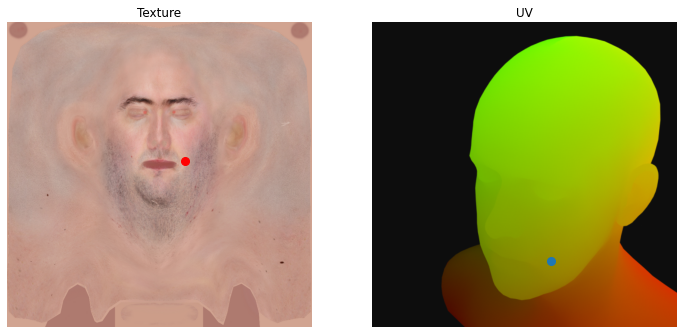

In [17]:
#@title UV画像上の位置と値の確認 { run: "auto" }
#@markdown UV画像上の位置を指定してください．

px = 300 #@param {type:"slider", min:0, max:511, step:1}
py = 400 #@param {type:"slider", min:0, max:511, step:1}

uv = UV[py, px, :2]
uv_p = uv2pixel(uv, T.shape[1], T.shape[0])

print("UV({0}, {1})=".format(px, py), uv)

fig = plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(T)
plt.title("Texture")
plt.plot(uv_p[0], uv_p[1], "ro", markersize=8)
plt.axis('off');

plt.subplot(1, 2, 2)
plt.imshow(UV)
plt.title("UV")
plt.plot(px, py, "o", markersize=8)
plt.axis('off');

## テクスチャマッピング結果の確認

uv2pixelが上手く実装されていれば，テクスチャマッピングの結果が出てきます．

テクスチャマッピングは，


```
# テクスチャマッピング
for y in range(h):
  for x in range(w):
    # (u, v)座標の取得
    uv = UV[y, x, :2]

    # (u, v)座標に対応する色を(x, y)の位置に貼りつける
    I[y,x,:] = texture_lookup(uv, T)
```

仕組みはかなりシンプルで，対応した場所を探して貼り付けているだけです．

3DCGの場合には，上記の仕組みを並列計算する仕組みがあるので高速に表示できます．


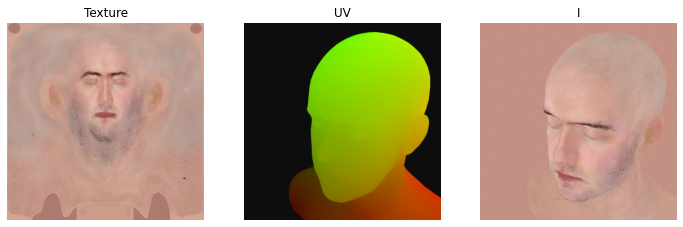

In [15]:
I = np.zeros_like(UV)
h, w = I.shape[:2]

# テクスチャマッピング
for y in range(h):
  for x in range(w):
    # (u, v)座標の取得
    uv = UV[y, x, :2]

    # (u, v)座標に対応する色を(x, y)の位置に貼りつける
    I[y,x,:] = texture_lookup(uv, T)

fig = plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(T)
plt.title("Texture")
plt.axis('off');

plt.subplot(1, 3, 2)
plt.imshow(UV)
plt.title("UV")
plt.axis('off');

plt.subplot(1, 3, 3)
plt.imshow(I)
plt.title("I")
plt.axis('off');